<a href="https://colab.research.google.com/github/Aduyg/EstadisticaComputarizada/blob/main/aduy_04_Sesion4_UdeA__C_Datos_Regresi%C3%B3n_LIneal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

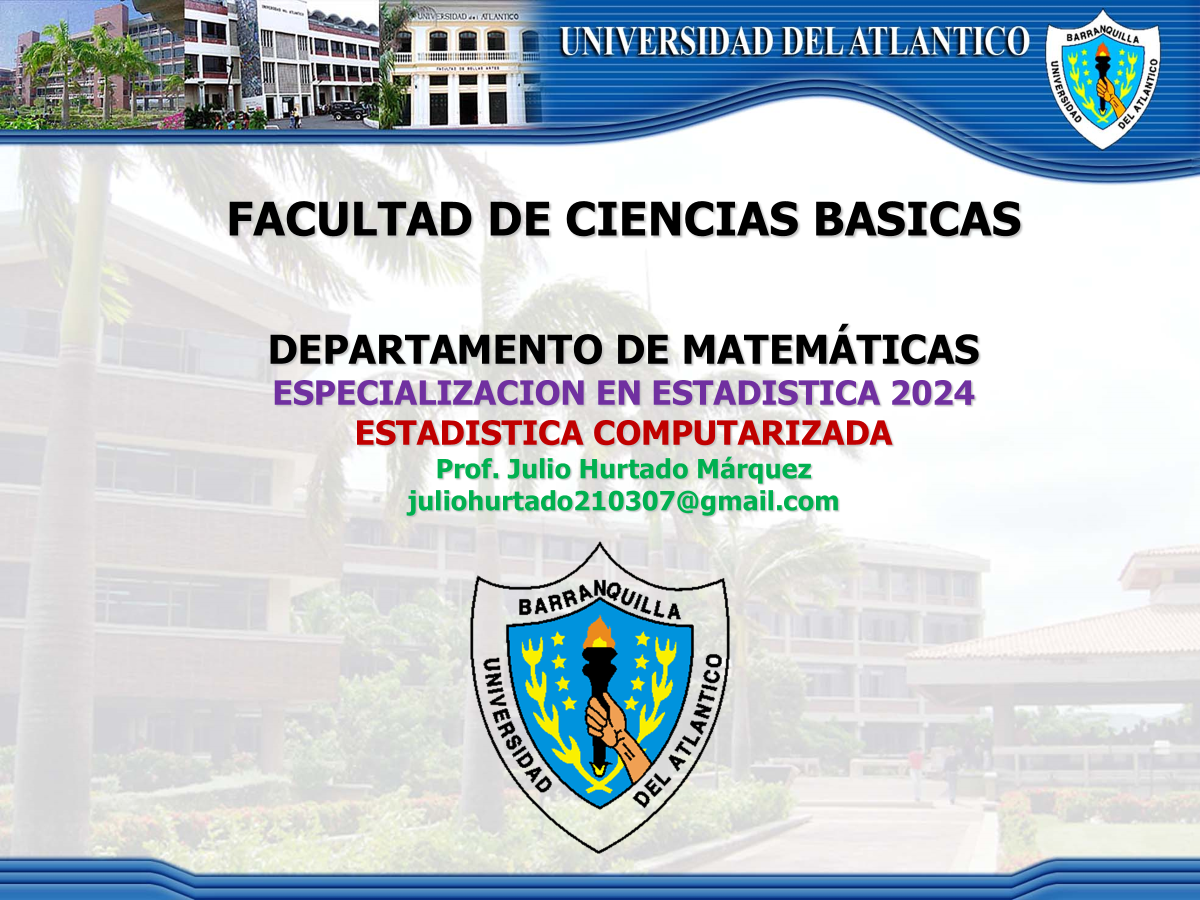

In [1]:
# @title **1. Importando las Librerias que usaremos**
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import seaborn.objects as so
import statsmodels.api as sm

In [2]:
# @title **2. Exportamos nuestra última base de datos**
df_datos2 = pd.read_csv("/content/df_datos3.csv", delimiter=',')
df_datos2

,CURSO,ASISTENCIA2,ASISTENCIA1,DEFINITIVA,DEFINITIVA2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,...,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
0,PROBABILIDAD,100,90,3.6,4.30,2314,F_NEGOCIOS,20,55,160,...,BAJO,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO
1,ESTADISTICAI,70,75,0.9,2.50,1136,DERECHO,18,80,185,...,ALTO,ALTO,ALTO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,MEDIO
2,PROBABILIDAD,85,95,3.9,3.80,2314,F_NEGOCIOS,19,60,158,...,BAJO,BAJO,BAJO,BAJO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO
3,PROBABILIDAD,5,5,2.9,0.50,2314,MECANICA,18,72,181,...,MEDIO,ALTO,BAJO,MEDIO,MEDIO,ALTO,MEDIO,ALTO,MEDIO,MEDIO
4,ESTADISTICAI,20,70,3.7,0.55,1009,PSICOLOGÍA,19,45,163,...,ALTO,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,PROBABILIDAD,90,90,2.3,2.10,2314,F_NEGOCIOS,18,59,176,...,MEDIO,MEDIO,MEDIO,ALTO,ALTO,ALTO,ALTO,BAJO,ALTO,ALTO
70,PROBABILIDAD,85,95,2.0,3.10,2314,F_NEGOCIOS,18,60,171,...,BAJO,BAJO,ALTO,ALTO,ALTO,BAJO,ALTO,BAJO,ALTO,BAJO
71,ESTADISTICAI,65,75,1.7,2.95,1136,DERECHO,20,55,164,...,BAJO,MEDIO,MEDIO,ALTO,ALTO,ALTO,BAJO,BAJO,MEDIO,BAJO
72,ESTADISTICAI,100,100,2.3,3.20,2313,PSICOLOGÍA,19,67,171,...,BAJO,BAJO,BAJO,BAJO,MEDIO,BAJO,BAJO,BAJO,BAJO,BAJO


In [ ]:
# @title **Mostrar información del tipo de las  variables y registros nulos (null)**
Tipos_de_variables = df_datos2.info()
print('Tipos de variables = ', Tipos_de_variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CURSO                                              74 non-null     object 
 1   ASISTENCIA2                                        74 non-null     int64  
 2   ASISTENCIA1                                        74 non-null     int64  
 3   DEFINITIVA                                         74 non-null     float64
 4   DEFINITIVA2                                        74 non-null     float64
 5   NRC                                                74 non-null     int64  
 6   PROGRAMA                                           74 non-null     object 
 7   EDAD                                               74 non-null     int64  
 8   PESO                                               74 non-null     int64  
 9   ESTATURA    

In [3]:
# @title **Convierte la variable NRC en object**
df_datos2['NRC'] = df_datos2['NRC'].astype(object)

In [4]:
# @title **Mostrar información del tipo de las  variables y registros nulos (null)**
Tipos_de_variables = df_datos2.info()
print('Tipos de variables = ', Tipos_de_variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CURSO                                              74 non-null     object 
 1   ASISTENCIA2                                        74 non-null     int64  
 2   ASISTENCIA1                                        74 non-null     int64  
 3   DEFINITIVA                                         74 non-null     float64
 4   DEFINITIVA2                                        74 non-null     float64
 5   NRC                                                74 non-null     object 
 6   PROGRAMA                                           74 non-null     object 
 7   EDAD                                               74 non-null     int64  
 8   PESO                                               74 non-null     int64  
 9   ESTATURA    

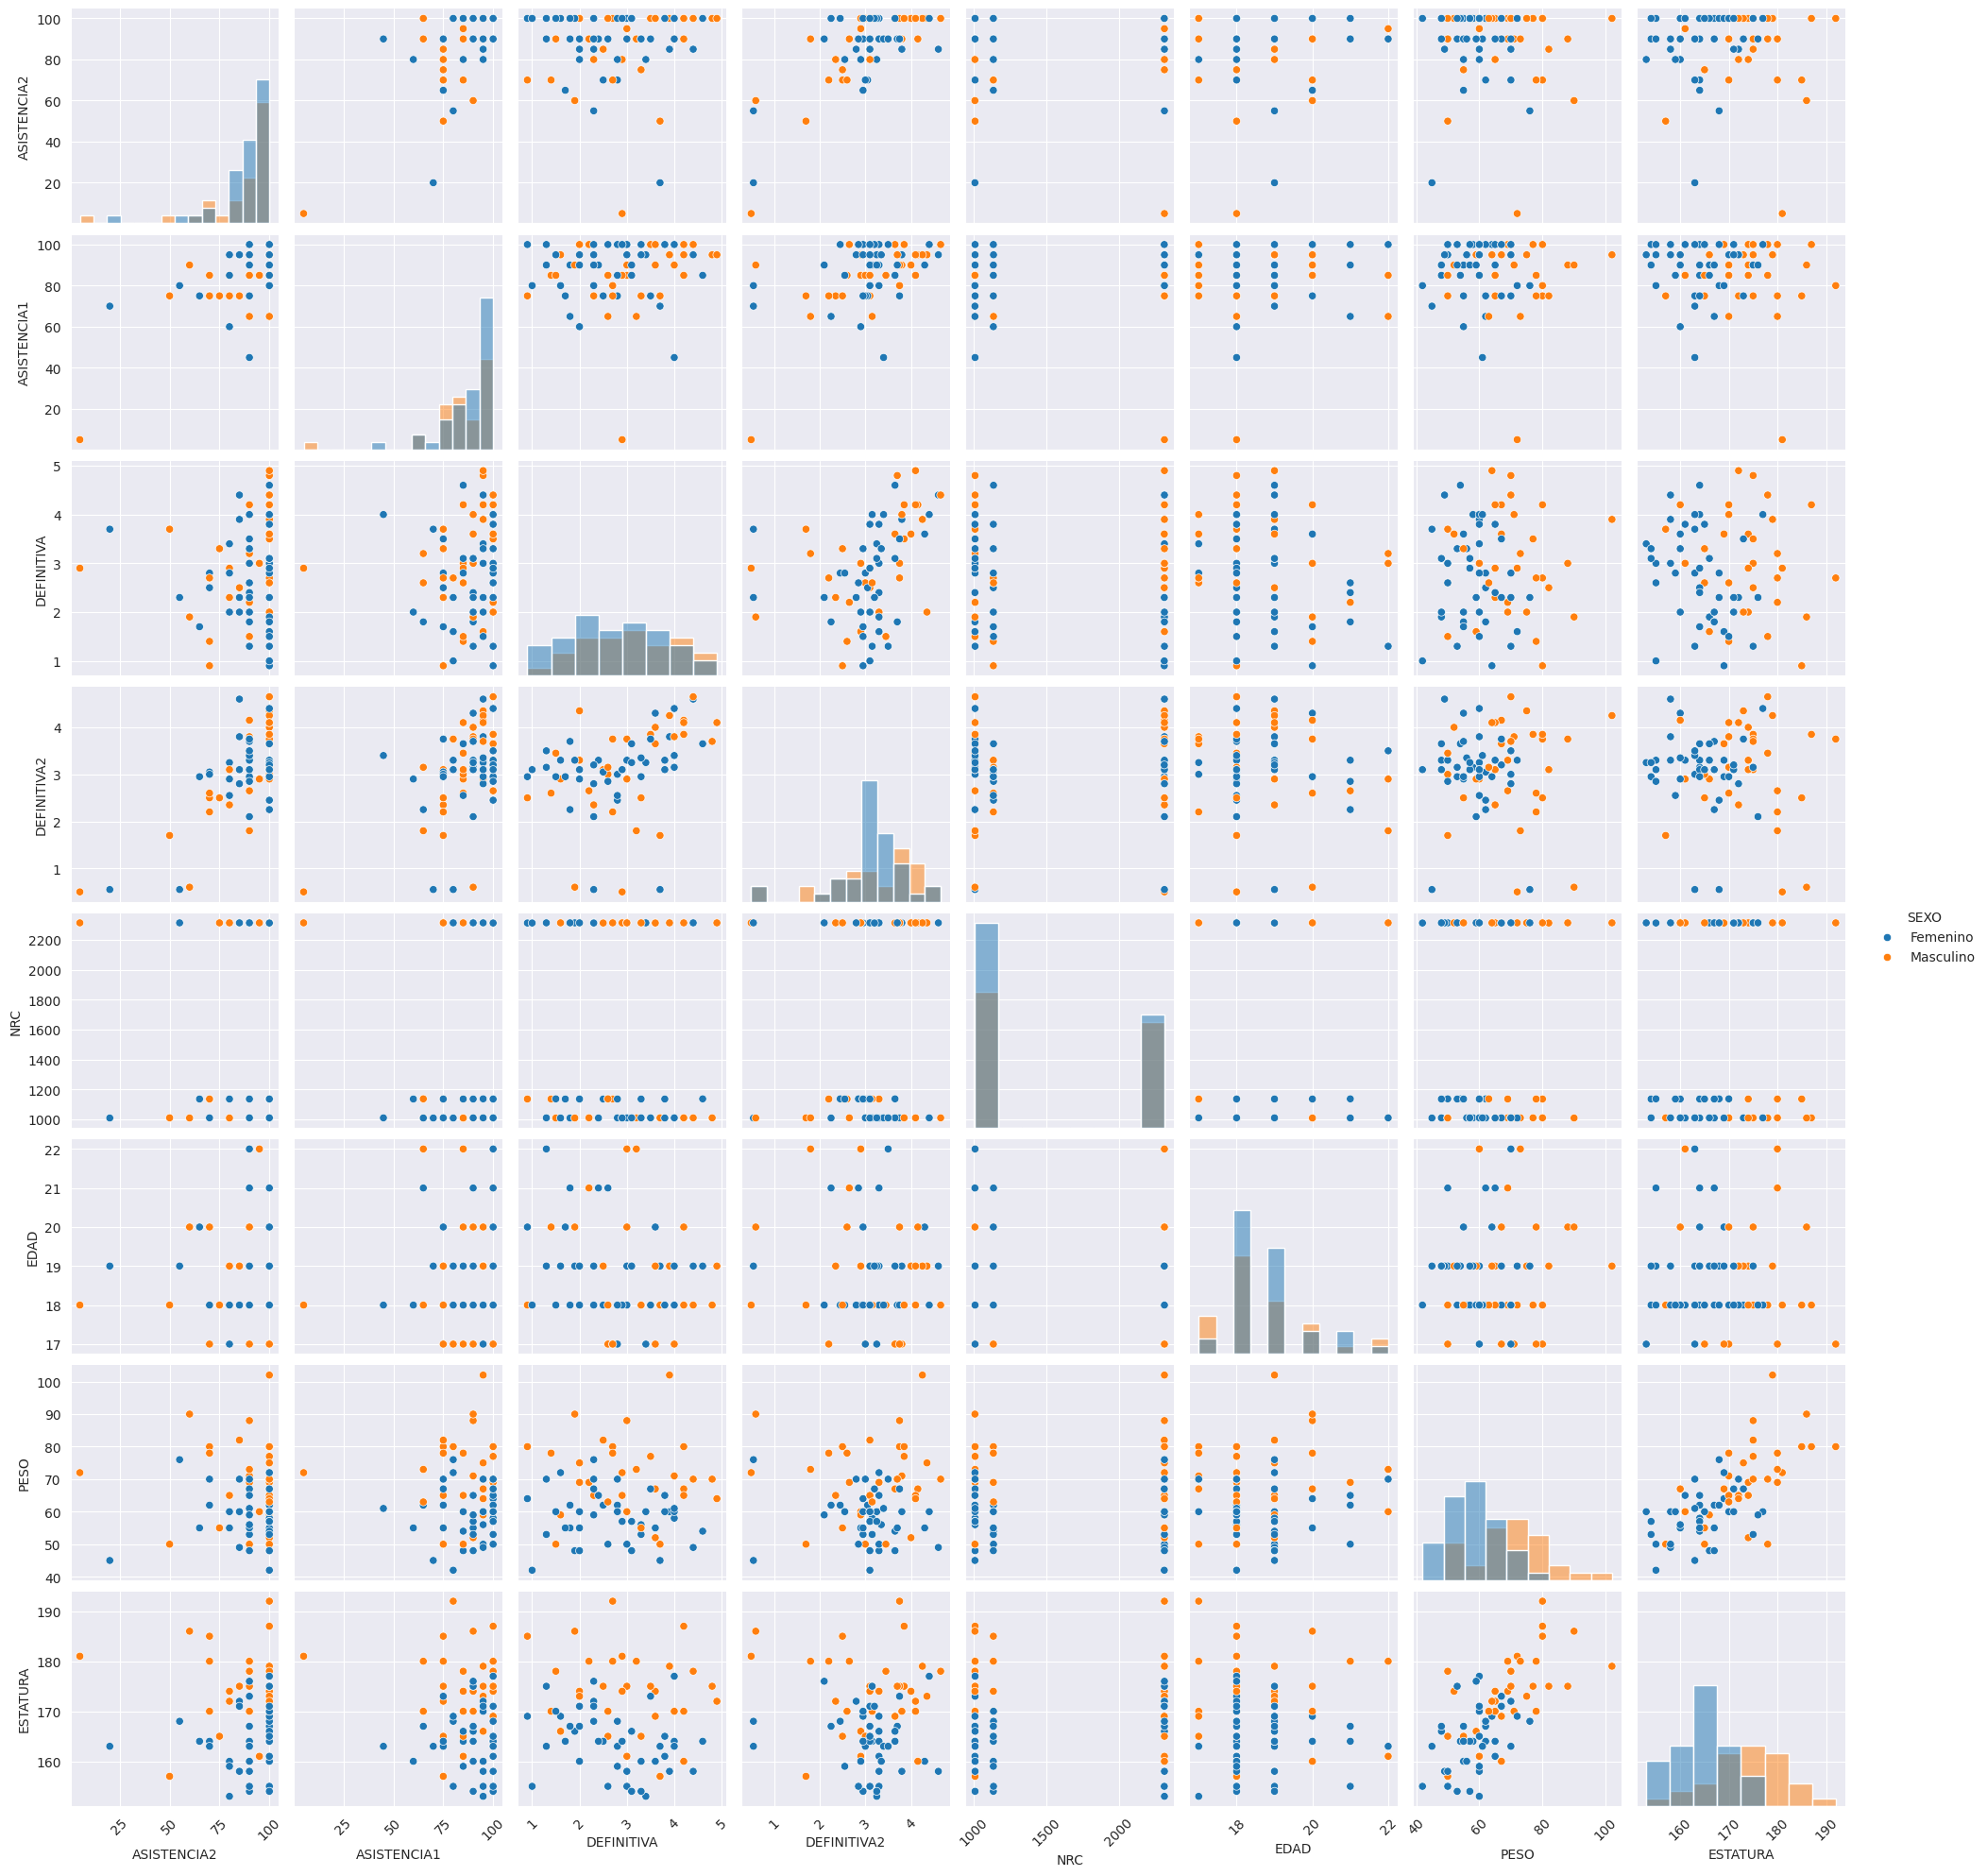

In [5]:
# @title **3. Visualización de las variables cuantitativas**
g = sns.pairplot(df_datos2, hue='SEXO', diag_kind = 'hist') # Definimos nuestro gráfico
for ax in g.axes.flat: # Un pequeño _for_ que recorra todas las variables
  plt.setp(ax.get_xticklabels(),rotation = 45) #Realizamos el grafico y estudiamos todas las relaciones entre las variables

In [14]:
# @title **Comparación de variables**

def compare_variables(df):
  """
  Crea un DataFrame que muestra las comparaciones entre variables, incluyendo
  covarianza, coeficiente de correlación de Pearson y R cuadrado en porcentaje
  con máximo 2 cifras decimales.

  Args:
    df: DataFrame de pandas con las variables a comparar.

  Returns:
    DataFrame con las comparaciones entre variables.
  """

  numeric_cols = df.select_dtypes(include=np.number).columns
  comparison_data = []

  for col1 in numeric_cols:
    for col2 in numeric_cols:
      if col1 != col2:
        covariance = df[col1].cov(df[col2])
        correlation = df[col1].corr(df[col2])
        try:
          X = df[[col1]]
          y = df[col2]
          model = LinearRegression()
          model.fit(X, y)
          y_pred = model.predict(X)
          r_squared = r2_score(y, y_pred)
        except ValueError:
          r_squared = np.nan

        comparison_data.append([col1, col2,
                                round(covariance, 2),
                                round(correlation, 2),
                                round(r_squared * 100, 2)])

  comparison_df = pd.DataFrame(comparison_data,
                               columns=['Variable 1', 'Variable 2',
                                        'Covarianza',
                                        'Correlación de Pearson',
                                        'R Cuadrado (%)'])

  return comparison_df


# Crear el DataFrame de comparaciones
comparisons_df = compare_variables(df_datos2)
comparisons_df

,Variable 1,Variable 2,Covarianza,Correlación de Pearson,R Cuadrado (%)
0,ASISTENCIA2,ASISTENCIA1,166.48,0.63,39.34
1,ASISTENCIA2,DEFINITIVA,1.40,0.08,0.64
2,ASISTENCIA2,DEFINITIVA2,11.11,0.73,52.72
3,ASISTENCIA2,EDAD,0.84,0.04,0.16
4,ASISTENCIA2,PESO,-12.92,-0.06,0.42
5,ASISTENCIA2,ESTATURA,-5.67,-0.04,0.14
6,ASISTENCIA1,ASISTENCIA2,166.48,0.63,39.34
7,ASISTENCIA1,DEFINITIVA,1.50,0.10,0.99
8,ASISTENCIA1,DEFINITIVA2,6.45,0.49,23.98
9,ASISTENCIA1,EDAD,0.94,0.05,0.27


In [15]:
# prompt: del dataframe anterior dejar coeficiente de correlación de Pearson mayor o.6

# Eliminar filas donde el coeficiente de correlación de Pearson es menor a 0.6
comparisons_df = comparisons_df[abs(comparisons_df['Correlación de Pearson']) >= 0.6]

# Mostrar el DataFrame actualizado
comparisons_df

,Variable 1,Variable 2,Covarianza,Correlación de Pearson,R Cuadrado (%)
0,ASISTENCIA2,ASISTENCIA1,166.48,0.63,39.34
2,ASISTENCIA2,DEFINITIVA2,11.11,0.73,52.72
6,ASISTENCIA1,ASISTENCIA2,166.48,0.63,39.34
18,DEFINITIVA2,ASISTENCIA2,11.11,0.73,52.72
35,PESO,ESTATURA,63.76,0.66,43.30
41,ESTATURA,PESO,63.76,0.66,43.30


In [ ]:
# @title **4. En el caso de encontrar datos o caracteres extraños**
df_datos2= df_datos2.replace(np.nan, '0')

In [ ]:
df_datos2.columns

Index(['CURSO', 'ASISTENCIA2', 'ASISTENCIA1', 'DEFINITIVA', 'DEFINITIVA2',
       'NRC', 'PROGRAMA', 'EDAD', 'PESO', 'ESTATURA', 'SEXO', 'ESTADO_CIVIL',
       'ESTRATO', 'URBANO', 'TRANSPORTE', 'GR_SANGUINEO',
       ' A: Facilidad para aprender cosas nuevas', 'B: Memoria y atención',
       'C: Relacionar tu experiencias con lo que aprendes', 'D: Autoestima',
       'E: Actitud hacia el Aprendizaje', 'F: Ambiente Familiar para estudiar',
       'G: Ansiedad académica', 'H: Recursos Educativos',
       'I: Mentalidad para superar adversidades',
       'K: Regularidad en el estudio'],
      dtype='object')

In [16]:
# @title **5. Redefinamos nuestras variables que vamos a usar en la regresión**
ASISTENCIA2 = df_datos2['ASISTENCIA2'].values
ASISTENCIA1 = df_datos2['ASISTENCIA1'].values
DEFINITIVA =df_datos2['DEFINITIVA'].values
DEFINITIVA2 = df_datos2['DEFINITIVA2'].values
EDAD = df_datos2['EDAD'].values
PESO =df_datos2['PESO'].values
ESTATURA = df_datos2['ESTATURA'].values

In [17]:
ASISTENCIA2

array([100,  70,  85,   5,  20, 100,  50, 100, 100,  95, 100, 100,  80,
        90, 100,  70,  90,  80,  85,  90, 100, 100, 100, 100, 100,  85,
        90, 100,  90, 100, 100,  80, 100, 100, 100,  70, 100,  90,  90,
        90, 100, 100,  90,  70,  80,  55,  90,  90, 100, 100,  90,  90,
       100, 100,  70, 100, 100, 100, 100,  80,  75,  60, 100,  90,  85,
        90, 100, 100,  90,  90,  85,  65, 100, 100])

In [18]:
df_datos2['ASISTENCIA2']

,ASISTENCIA2
0,100
1,70
2,85
3,5
4,20
...,...
69,90
70,85
71,65
72,100


In [23]:
x1 = np.array([ESTATURA])
x1

array([[160, 185, 158, 181, 163, 169, 157, 155, 161, 161, 174, 164, 153,
        170, 174, 170, 160, 172, 158, 180, 175, 173, 166, 179, 178, 175,
        175, 169, 180, 170, 166, 160, 175, 165, 192, 164, 167, 154, 167,
        173, 155, 166, 160, 163, 174, 168, 158, 155, 168, 164, 178, 164,
        164, 175, 180, 187, 172, 177, 169, 159, 165, 186, 170, 163, 172,
        167, 154, 170, 163, 176, 171, 164, 171, 165]])

In [21]:
# @title **6. Definimos las variables Dependientes y las Independientes**
X = np.array([ESTATURA]).T # Elegimos una variable para la regresión (.T es para la transpuesta)
Y = np.array(PESO) # Variable dependiente

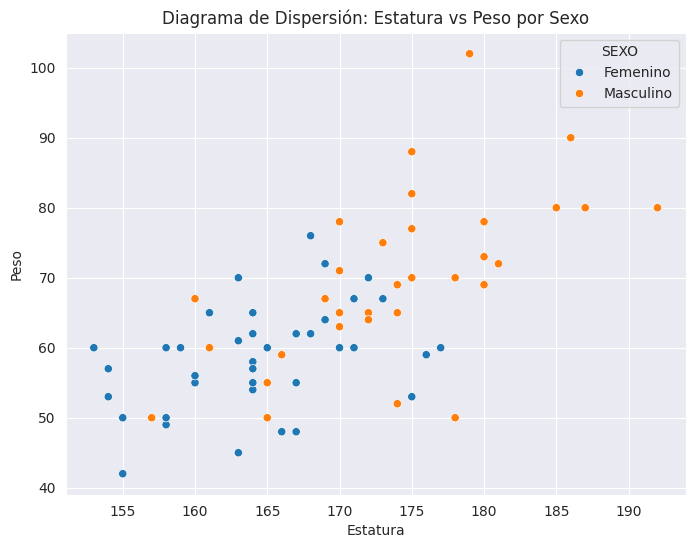

In [29]:
# @title **Diagrama de Dispersión ESTATURA vs PESO diferenciar SEXO**

# Crear un diagrama de dispersión de estatura vs peso, diferenciando por sexo
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ESTATURA', y='PESO', hue='SEXO', data=df_datos2)
plt.title('Diagrama de Dispersión: Estatura vs Peso por Sexo')
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.show()

In [22]:
x

array([[160, 185, 158, 181, 163, 169, 157, 155, 161, 161, 174, 164, 153,
        170, 174, 170, 160, 172, 158, 180, 175, 173, 166, 179, 178, 175,
        175, 169, 180, 170, 166, 160, 175, 165, 192, 164, 167, 154, 167,
        173, 155, 166, 160, 163, 174, 168, 158, 155, 168, 164, 178, 164,
        164, 175, 180, 187, 172, 177, 169, 159, 165, 186, 170, 163, 172,
        167, 154, 170, 163, 176, 171, 164, 171, 165]])

In [25]:
# @title **7. Definimos el Modelo de Regresión Lineal**
reg = LinearRegression() # Parte del Modelo
regAjustado = reg.fit(X,Y) # Ajustar el modelo
Y_pred = regAjustado.predict(X) # Predicción del modelo
error = np.sqrt(mean_squared_error(Y,Y_pred)) , # Error cuadratico medio
R_Ajustado = regAjustado.score(X,Y)


In [27]:
# @title **8. Los resultados del Modelo**

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Así definimos el modelo de regresión lineal
reg = LinearRegression()
regAjustado = reg.fit(X, Y)
Y_pred = regAjustado.predict(X)

# Calculamos RMSE o sea el error cuadratico medio
rmse = np.sqrt(mean_squared_error(Y, Y_pred))

# Calculamos la bondad de ajuste del modelo R^2
R_squared = r2_score(Y, Y_pred)

# Calculamos los coeficientes de correlación de Pearson
r = np.corrcoef(Y, Y_pred)[0, 1]

print(f"El error cuadrático medio es RMSE = {rmse:.4f}")
print(f"La bondad de ajuste o coeficiente de Determinación R^2: {R_squared*100:.2f}%")
print(f"Coeficiente de correlación de Pearso es r ={r:.2f}")

El error cuadrático medio es RMSE = 8.4920
La bondad de ajuste o coeficiente de Determinación R^2: 43.30%
Coeficiente de correlación de Pearso es r =0.66


In [30]:
# @title **9. La recta de regresion estimada**

# Obtenmos los coeficientes del Modelo de regresión:  la pendiente (coeficiente de regresión) y la intersección (ordenada al origen)

pendiente = reg.coef_[0]
intercepto = reg.intercept_

# Imprime la ecuación de la recta de regresión
print(f"La recta de regresión estimada es: Y = {pendiente:.2f}X + {intercepto:.2f}")

La recta de regresión estimada es: Y = 0.88X + -84.13


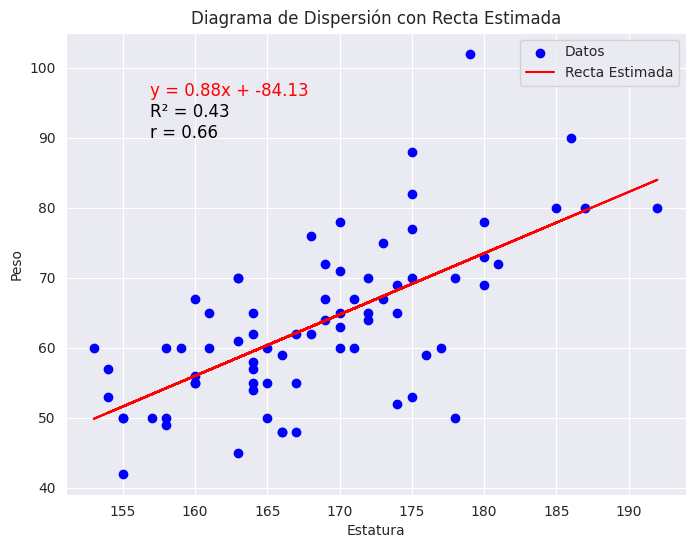

In [31]:
# @title **10. Diagrama de Dispersión con Recta Estimada**

# Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos')

# Dibujar la recta estimada
plt.plot(X, Y_pred, color='red', label='Recta Estimada')

# Añadir la ecuación de la recta estimada
# y = mx + b, donde m es la pendiente y b es la intersección con el eje y
m = reg.coef_[0]
b = reg.intercept_
ecuacion = f'y = {m:.2f}x + {b:.2f}'
plt.text(min(X) + 0.1*(max(X)-min(X)), max(Y)-0.1*(max(Y)-min(Y)), ecuacion, fontsize=12, color='red')

# Añadir el valor de R^2 y r en el diagrama
plt.text(min(X) + 0.1*(max(X)-min(X)), max(Y)-0.15*(max(Y)-min(Y)), f'R² = {R_squared:.2f}', fontsize=12, color='black')
plt.text(min(X) + 0.1*(max(X)-min(X)), max(Y)-0.20*(max(Y)-min(Y)), f'r = {r:.2f}', fontsize=12, color='black')

# Etiquetas de los ejes y título
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.title('Diagrama de Dispersión con Recta Estimada')
plt.legend()
plt.show()

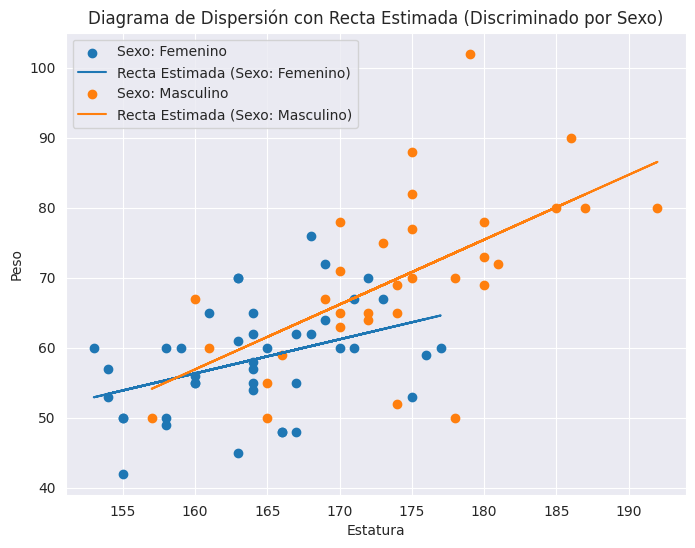

In [33]:
# prompt: DIAGRAMA DE DISPERSIÓN DISCRIMINADO POR SEXO junto con la recta estimada

# @title **10.1 Diagrama de Dispersión con Recta Estimada, Discriminado por Sexo**

# Crear el diagrama de dispersión, discriminado por sexo
plt.figure(figsize=(8, 6))

# Iterar sobre los sexos
for sexo in df_datos2['SEXO'].unique():
  # Filtrar el DataFrame para el sexo actual
  df_sexo = df_datos2[df_datos2['SEXO'] == sexo]

  # Obtener los datos de estatura y peso para el sexo actual
  X_sexo = df_sexo['ESTATURA'].values.reshape(-1, 1)
  Y_sexo = df_sexo['PESO'].values

  # Ajustar la regresión lineal para el sexo actual
  reg_sexo = LinearRegression()
  reg_sexo.fit(X_sexo, Y_sexo)
  Y_pred_sexo = reg_sexo.predict(X_sexo)

  # Dibujar los puntos del diagrama de dispersión para el sexo actual
  plt.scatter(X_sexo, Y_sexo, label=f'Sexo: {sexo}')

  # Dibujar la recta estimada para el sexo actual
  plt.plot(X_sexo, Y_pred_sexo, label=f'Recta Estimada (Sexo: {sexo})')

# Añadir etiquetas de los ejes y título
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.title('Diagrama de Dispersión con Recta Estimada (Discriminado por Sexo)')
plt.legend()
plt.show()

In [35]:
# @title **11. Realizar una predicción para el Peso**

ESTATURA_1 = 175

prediction = regAjustado.predict([[ESTATURA_1]])[0]
print(f'La predicción del Peso para la estatura  Y({ESTATURA_1}) = {prediction:.2f}')

La predicción del Peso para la estatura  Y(175) = 69.11


In [39]:
# @title **12. Regresión Lineal Multiple con tres variables Independientes**
X2 = np.array([DEFINITIVA, EDAD, ASISTENCIA2 ]).T # Elegimos una variable para la regresión (.T es para la transpuesta)
Y2 = np.array(DEFINITIVA2) # Variable dependiente

In [41]:
# @title **13. Definimos el Modelo de Regresión Lineal Nuevo**
reg = LinearRegression() # Parte del Modelo
reg = reg.fit(X2,Y2) # Ajustar el modelo
Y_pred = reg.predict(X2) # Predicción del odelo
error = np.sqrt(mean_squared_error(Y2,Y_pred)) , # Error cuadratico medio
R_2 = reg.score(X2,Y2)

In [42]:
# @title **14. Los resultados del Modelo**

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Para recordar como definimos el par X, Y
# X = np.array([ESTATURA]).T
# Y = np.array(PESO)

# Así definimos el modelo de regresión lineal
reg2 = LinearRegression()
reg2 = reg.fit(X2, Y2)
Y_pred2 = reg2.predict(X2)

# Calculamos RMSE o sea el error cuadratico medio
rmse2 = np.sqrt(mean_squared_error(Y2, Y_pred2))

# Calculamos la bondad de ajuste del modelo R^2
R_squared2 = r2_score(Y2, Y_pred2)

# Calculamos los coeficientes de correlación de Pearson
r = np.corrcoef(Y2, Y_pred2)[0, 1]

print(f"El error cuadrático medio es RMSE = {rmse2:.4f}")
print(f"La bondad de ajuste o coeficiente de Determinación R^2: {R_squared2*100:.2f}%")
print(f"Coeficiente de correlación de Pearson es r ={r:.2f}")

El error cuadrático medio es RMSE = 0.5324
La bondad de ajuste o coeficiente de Determinación R^2: 62.13%
Coeficiente de correlación de Pearson es r =0.79


In [43]:
# @title **15. Los coeficientes del Modelo y la recta de regresion estimada**

intercepto = reg2.intercept_
coef_1 = reg2.coef_[0]
coef_2 = reg2.coef_[1]
coef_3 = reg2.coef_[2]

# imprime los coeficintes del Modelo de Regresión
print(f"Intercepto: {intercepto:.2f}")
print(f"Coeficiente 1: {coef_1:.2f}")
print(f"Coeficiente 2: {coef_2:.2f}")
print(f"Coeficiente 3: {coef_3:.2f}")

# Imprime la ecuación de la recta de regresión
print(f"La recta de regresión estimada es: Y = {coef_1:.2f}X1 + {coef_2:.2f}X2 + {coef_3:.2f}X3 + {intercepto:.2f}")


Intercepto: 0.48
Coeficiente 1: 0.24
Coeficiente 2: -0.06
Coeficiente 3: 0.04
La recta de regresión estimada es: Y = 0.24X1 + -0.06X2 + 0.04X3 + 0.48


In [44]:
# @title **16. Los coeficientes del Modelo y la recta de regresion estimada de una forma mas elegante**

# Obtén los coeficientes del modelo de regresión Múltiple
coeficientes = reg2.coef_
intercepto = reg2.intercept_

# Imprime los coeficientes
print("Coeficientes del modelo reg2:")
for i, coef in enumerate(coeficientes):
  print(f"Coeficiente de la variable X{i+1}: {coef:.2f}")
print(f"Intercepto: {intercepto:.2f}")

# Ecuación de la recta del modelo de regresión Múltiple
print("\nEcuación de la recta de regresión:")
Ecuacion = "Y2 = "
for i, coef in enumerate(coeficientes):
  Ecuacion += f"{coef:.2f} * X{i+1} + "
Ecuacion += f"{intercepto:.2f}"
Ecuacion

Coeficientes del modelo reg2:
Coeficiente de la variable X1: 0.24
Coeficiente de la variable X2: -0.06
Coeficiente de la variable X3: 0.04
Intercepto: 0.48

Ecuación de la recta de regresión:


'Y2 = 0.24 * X1 + -0.06 * X2 + 0.04 * X3 + 0.48'

In [45]:
# @title **17. Otras métricas del modelo de Regresión Multiple**
print(f'Error Medio Absoluto - MAE = {mean_absolute_error(Y2,Y_pred2):.3f}' )
print(f"Cuadrado Medio del error - MSE = {mean_squared_error(Y2,Y_pred2):.3f}")
print(f"Desviación Cuadrática Media - RMSE = {np.sqrt(mean_squared_error(Y2,Y_pred2)):.3f}")
r2 = r2_score(Y2,Y_pred2)
print(f'R cuadrado - Model Score: R2 = {r2*100:.2f}%')

Error Medio Absoluto - MAE = 0.418
Cuadrado Medio del error - MSE = 0.283
Desviación Cuadrática Media - RMSE = 0.532
R cuadrado - Model Score: R2 = 62.13%


In [46]:
# @title **18. Realizar una predicción para el DEFINITIVA2**
DEFINITIVA_1 = 4.3
EDAD_1 = 21
ASISTENCIA2_1 = 90


prediccion = reg.predict([[DEFINITIVA_1, EDAD_1,ASISTENCIA2_1]])[0]

print(f'La predicción del Peso para la estatura  Y{DEFINITIVA_1, EDAD_1,ASISTENCIA2_1} = {prediccion:.2f}')

La predicción del Peso para la estatura  Y(4.3, 21, 90) = 3.39


In [47]:
df_datos2.columns

Index(['CURSO', 'ASISTENCIA2', 'ASISTENCIA1', 'DEFINITIVA', 'DEFINITIVA2',
       'NRC', 'PROGRAMA', 'EDAD', 'PESO', 'ESTATURA', 'SEXO', 'ESTADO_CIVIL',
       'ESTRATO', 'URBANO', 'TRANSPORTE', 'GR_SANGUINEO',
       ' A: Facilidad para aprender cosas nuevas', 'B: Memoria y atención',
       'C: Relacionar tu experiencias con lo que aprendes', 'D: Autoestima',
       'E: Actitud hacia el Aprendizaje', 'F: Ambiente Familiar para estudiar',
       'G: Ansiedad académica', 'H: Recursos Educativos',
       'I: Mentalidad para superar adversidades',
       'K: Regularidad en el estudio'],
      dtype='object')

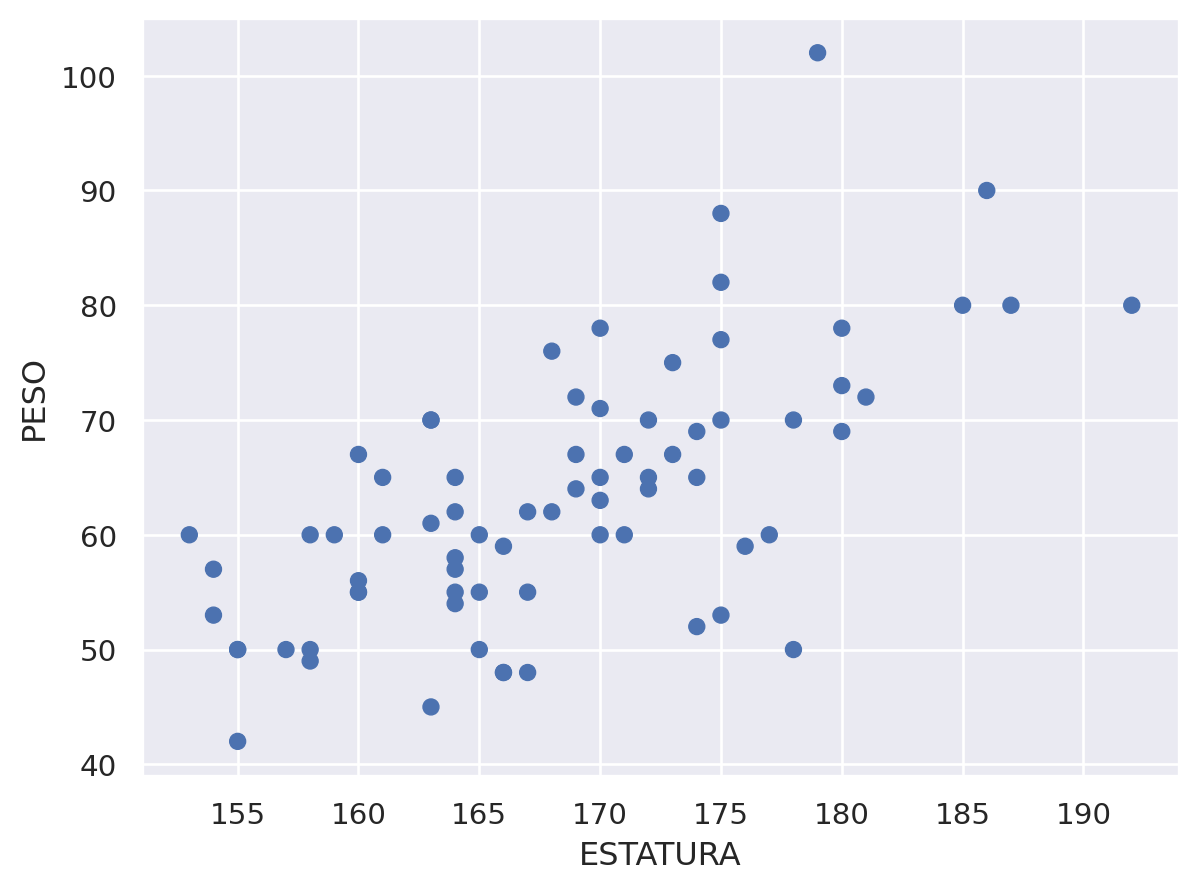

In [48]:
# @title **19. Mas sobre Regresión Lineal - Gráfico de Dispersión "ESTATURA vs PESO"**
p = so.Plot(df_datos2, "ESTATURA", "PESO").add(so.Dot())
p

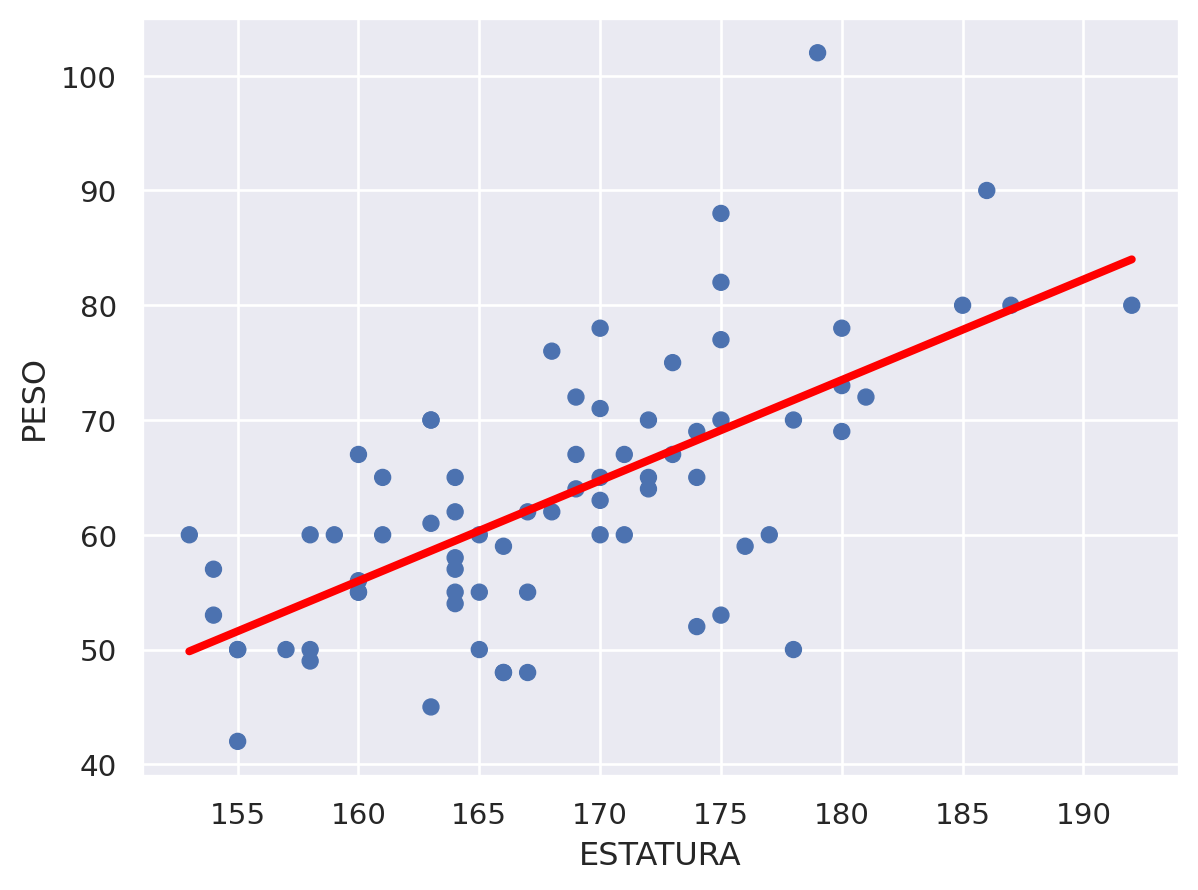

In [49]:
# @title **20. Gráfico de Dispersión y recta de estimación**
p.add(so.Line(color="red", linewidth=3), so.PolyFit(1))

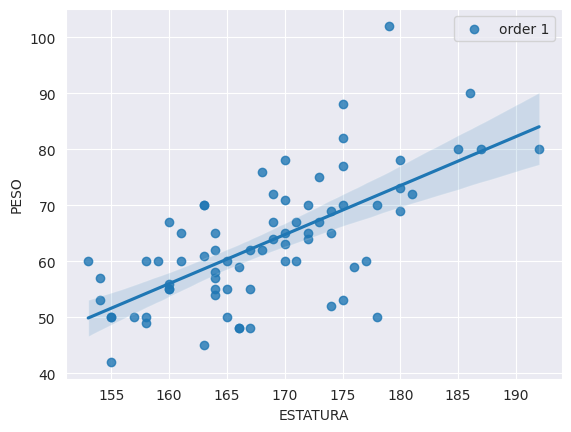

In [50]:
# @title **21. Gráfico de Dispersión  usando _sns.regplot_**

sns.regplot(x="ESTATURA", y="PESO", scatter=True, order=1, data=df_datos2, label="order 1")
plt.legend(loc="upper right")

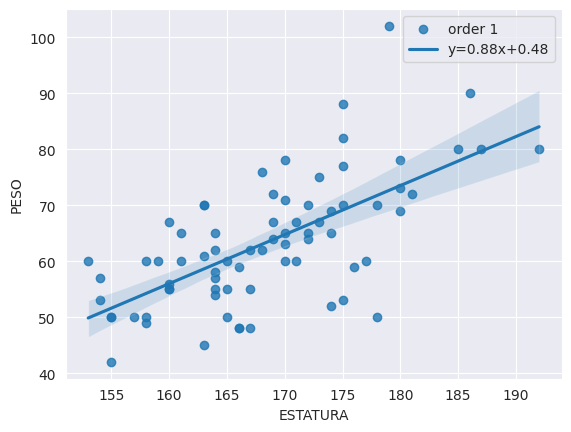

In [51]:
# @title **22. Gráfico de Dispersión usando _sns.regplot_ y la recta de regresión**
sns.regplot(x="ESTATURA", y="PESO", scatter=True, order=1, data=df_datos2, label="order 1", line_kws={'label':"y={0:.2f}x+{1:.2f}".format(pendiente, intercepto)})
plt.legend(loc="upper right")

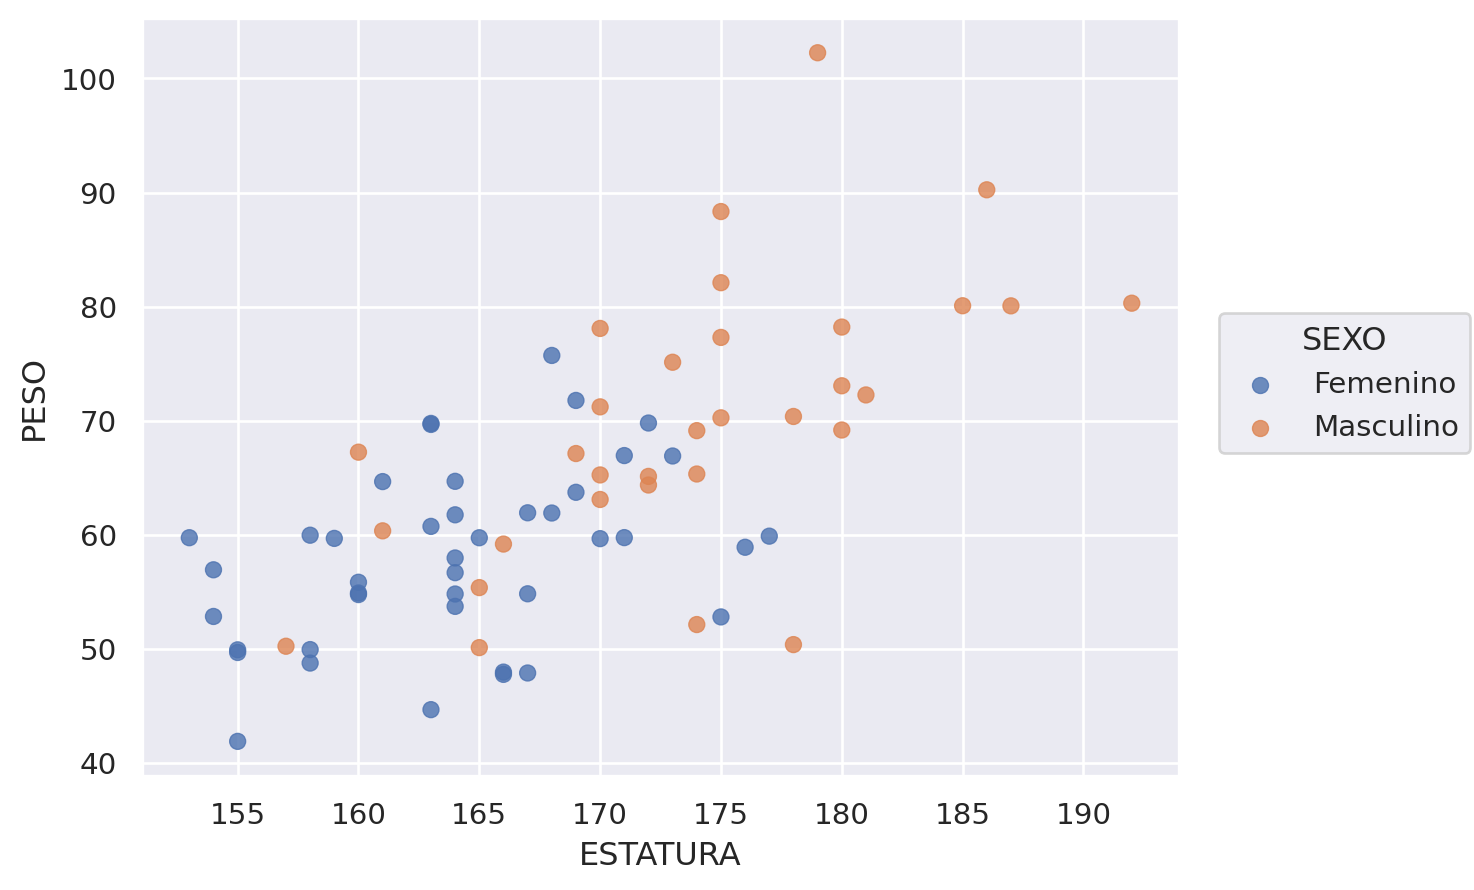

In [52]:
# @title **23.  Gráfico de Dispersión de las tres variables cuantitativas relacionadas ESTATURA vs PESO vs SEXO**
so.Plot(df_datos2, x="ESTATURA", y="PESO", color="SEXO").add(so.Dot(alpha=.8), so.Dodge(), so.Jitter(.8), orient="y")


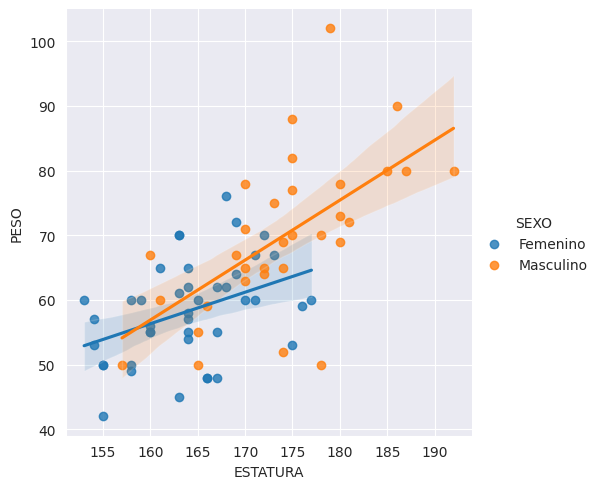

In [53]:
# @title **24.  Gráfico de Dispersión - "ESTATURA vs PESO" vs "SEXO" y sus rectas**
sns.lmplot(x="ESTATURA", y="PESO", hue="SEXO", data=df_datos2)

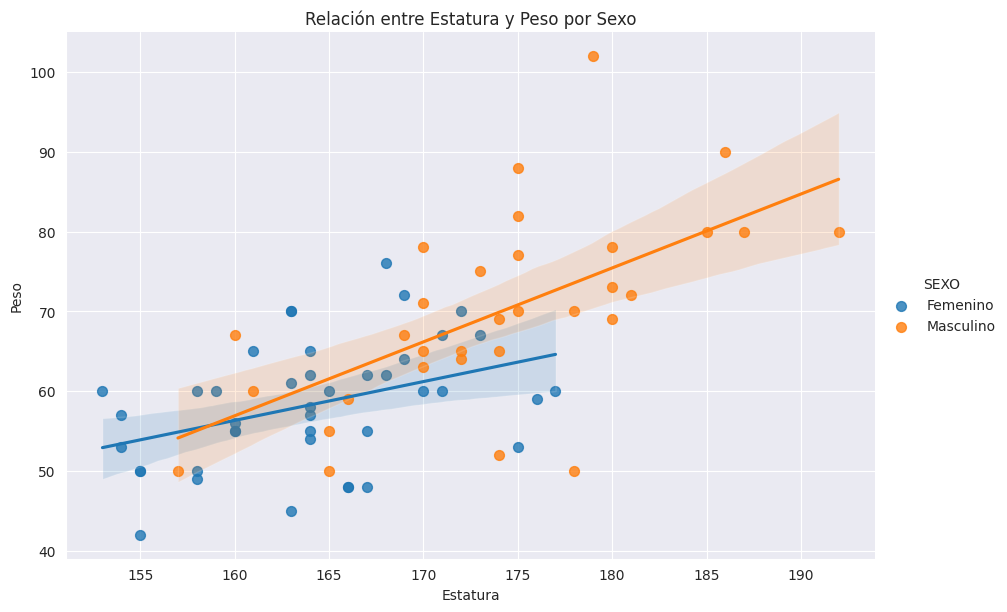

In [57]:
# prompt: ampliar la figuar anterior sns.lmplot(x="ESTATURA", y="PESO", hue="SEXO", data=df_datos2)

# @title **24.1  Gráfico de Dispersión - "ESTATURA vs PESO" vs "SEXO" y sus rectas (Ampliado)**
sns.lmplot(x="ESTATURA", y="PESO", hue="SEXO", data=df_datos2, height=6, aspect=1.5, scatter_kws={"s": 50})
plt.title("Relación entre Estatura y Peso por Sexo")
plt.xlabel("Estatura")
plt.ylabel("Peso")
plt.show()

In [54]:
# @title **25.  Halla la Recta de regresión para PESO vs ESTATURA para SEXO = Femenino**

# Filtrar el DataFrame para incluir solo los datos de sexo femenino
df_femenino = df_datos2[df_datos2['SEXO'] == 'Femenino']

# Definir las variables independientes (X) y dependientes (Y)
X = df_femenino['ESTATURA'].values.reshape(-1, 1)  # ESTATURA como variable independiente
Y = df_femenino['PESO'].values  # PESO como variable dependiente

# Crear un modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo a los datos
reg.fit(X, Y)

# Obtener los coeficientes de la regresión (pendiente e intersección)
pendiente = reg.coef_[0]
intercepto = reg.intercept_

# Imprimir la ecuación de la recta de regresión
print(f"La recta de regresión estimada para PESO vs ESTATURA (SEXO = Femenino) es: Y = {pendiente:.2f}X + {intercepto:.2f}")

La recta de regresión estimada para PESO vs ESTATURA (SEXO = Femenino) es: Y = 0.49X + -21.57


In [55]:
# @title **26.  Halla la Recta de regresión para PESO vs ESTATURA para SEXO = Masculino**

# Filtrar el DataFrame para incluir solo los datos de sexo masculino
df_masculino = df_datos2[df_datos2['SEXO'] == 'Masculino']

# Definir las variables independientes (X) y dependientes (Y)
X = df_masculino['ESTATURA'].values.reshape(-1, 1)  # ESTATURA como variable independiente
Y = df_masculino['PESO'].values  # PESO como variable dependiente

# Crear un modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo a los datos
reg.fit(X, Y)

# Obtener los coeficientes de la regresión (pendiente e intersección)
pendiente = reg.coef_[0]
intercepto = reg.intercept_

# Imprimir la ecuación de la recta de regresión
print(f"La recta de regresión estimada para PESO vs ESTATURA (SEXO = Masculino) es: Y = {pendiente:.2f}X + {intercepto:.2f}")

La recta de regresión estimada para PESO vs ESTATURA (SEXO = Masculino) es: Y = 0.93X + -91.30


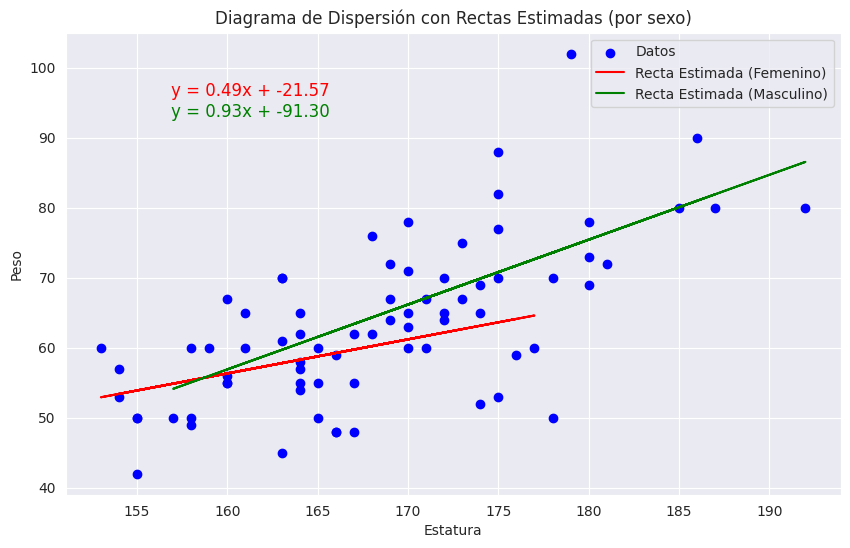

In [58]:
# @title **27.  Dibujame grafico de dispersion las dos rectas estimadas y su ecuacion**

# Crear el diagrama de dispersión con las dos rectas estimadas
plt.figure(figsize=(10, 6))
plt.scatter(df_datos2['ESTATURA'], df_datos2['PESO'], color='blue', label='Datos')

# Dibujar la recta estimada para el sexo femenino
df_femenino = df_datos2[df_datos2['SEXO'] == 'Femenino']
X_femenino = df_femenino['ESTATURA'].values.reshape(-1, 1)
Y_femenino = df_femenino['PESO'].values
reg_femenino = LinearRegression().fit(X_femenino, Y_femenino)
Y_pred_femenino = reg_femenino.predict(X_femenino)
plt.plot(X_femenino, Y_pred_femenino, color='red', label='Recta Estimada (Femenino)')

# Dibujar la recta estimada para el sexo masculino
df_masculino = df_datos2[df_datos2['SEXO'] == 'Masculino']
X_masculino = df_masculino['ESTATURA'].values.reshape(-1, 1)
Y_masculino = df_masculino['PESO'].values
reg_masculino = LinearRegression().fit(X_masculino, Y_masculino)
Y_pred_masculino = reg_masculino.predict(X_masculino)
plt.plot(X_masculino, Y_pred_masculino, color='green', label='Recta Estimada (Masculino)')


# Obtener la ecuación de la recta estimada para femenino
pendiente_femenino = reg_femenino.coef_[0]
intercepto_femenino = reg_femenino.intercept_
ecuacion_femenino = f'y = {pendiente_femenino:.2f}x + {intercepto_femenino:.2f}'
plt.text(min(df_datos2['ESTATURA']) + 0.1*(max(df_datos2['ESTATURA'])-min(df_datos2['ESTATURA'])), max(df_datos2['PESO'])-0.1*(max(df_datos2['PESO'])-min(df_datos2['PESO'])), ecuacion_femenino, fontsize=12, color='red')


# Obtener la ecuación de la recta estimada para masculino
pendiente_masculino = reg_masculino.coef_[0]
intercepto_masculino = reg_masculino.intercept_
ecuacion_masculino = f'y = {pendiente_masculino:.2f}x + {intercepto_masculino:.2f}'
plt.text(min(df_datos2['ESTATURA']) + 0.1*(max(df_datos2['ESTATURA'])-min(df_datos2['ESTATURA'])), max(df_datos2['PESO'])-0.15*(max(df_datos2['PESO'])-min(df_datos2['PESO'])), ecuacion_masculino, fontsize=12, color='green')




# Etiquetas de los ejes y título
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.title('Diagrama de Dispersión con Rectas Estimadas (por sexo)')
plt.legend()
plt.show()

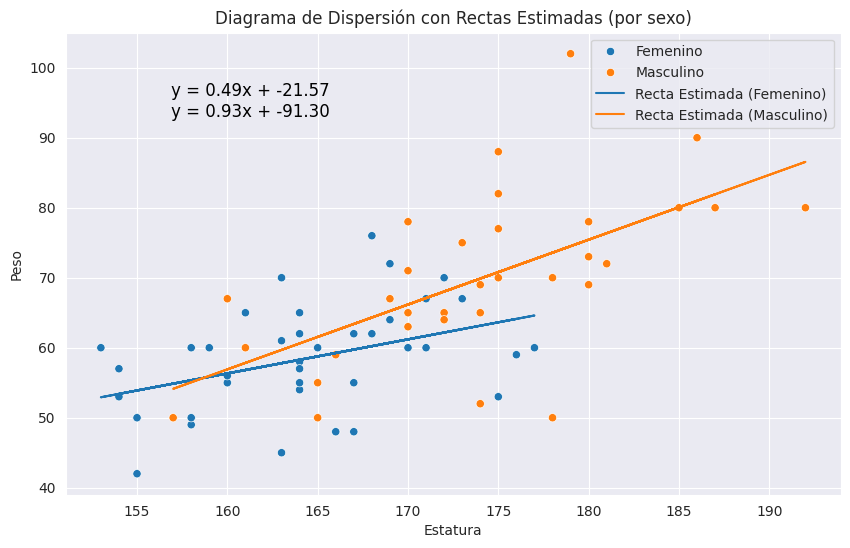

In [59]:
# prompt: en el diagrama de dispersión con rectas estimadas diferencia los sexos

# @title **27.1  Dibujame grafico de dispersion las dos rectas estimadas y su ecuacion (optimizado)**

# Crear el diagrama de dispersión con las dos rectas estimadas
plt.figure(figsize=(10, 6))

# Dibujar los puntos del diagrama de dispersión para cada sexo
sns.scatterplot(x='ESTATURA', y='PESO', hue='SEXO', data=df_datos2)

# Ajustar la regresión lineal para cada sexo
for sexo in df_datos2['SEXO'].unique():
  df_sexo = df_datos2[df_datos2['SEXO'] == sexo]
  X_sexo = df_sexo['ESTATURA'].values.reshape(-1, 1)
  Y_sexo = df_sexo['PESO'].values

  reg_sexo = LinearRegression()
  reg_sexo.fit(X_sexo, Y_sexo)
  Y_pred_sexo = reg_sexo.predict(X_sexo)

  plt.plot(X_sexo, Y_pred_sexo, label=f'Recta Estimada ({sexo})')

  # Obtener la ecuación de la recta estimada para cada sexo
  pendiente_sexo = reg_sexo.coef_[0]
  intercepto_sexo = reg_sexo.intercept_
  ecuacion_sexo = f'y = {pendiente_sexo:.2f}x + {intercepto_sexo:.2f}'
  plt.text(min(df_datos2['ESTATURA']) + 0.1*(max(df_datos2['ESTATURA'])-min(df_datos2['ESTATURA'])),
           max(df_datos2['PESO']) - 0.1*(max(df_datos2['PESO'])-min(df_datos2['PESO'])) - (df_datos2['SEXO'].unique().tolist().index(sexo) * 0.05*(max(df_datos2['PESO'])-min(df_datos2['PESO']))),
           ecuacion_sexo, fontsize=12, color='black')

# Etiquetas de los ejes y título
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.title('Diagrama de Dispersión con Rectas Estimadas (por sexo)')
plt.legend()
plt.show()